In [1]:
import numpy as np
import os, matplotlib
from matplotlib import pyplot as plt

### Tensorflow 2.0 ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import utils

In [2]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path='minist.npz')
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
x_train_list = []
x_test_list = []
for i, i_ in enumerate(x_train[:60000]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_train[i]
    x_train_list.append(arr)
for i, i_ in enumerate(x_test[:20000]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_test[i]
    x_test_list.append(arr)

x_train1 = np.expand_dims(np.array(x_train_list), axis=-1)
x_test1 = np.expand_dims(np.array(x_test_list), axis=-1)
print(x_train1.shape, x_test1.shape)

(60000, 32, 32, 1) (10000, 32, 32, 1)


In [4]:
y_train_list = []
y_test_list = []
for i, i_ in enumerate(y_train[:60000]):
    zero = [0]*10
    zero[i_] = 1
    y_train_list.append(zero)

for i, i_ in enumerate(y_test[:20000]):
    zero = [0]*10
    zero[i_] = 1
    y_test_list.append(zero)    
    
y_train1 = np.array(y_train_list)
y_test1 = np.array(y_test_list)
print(y_train1.shape, y_test1.shape)

(60000, 10) (10000, 10)


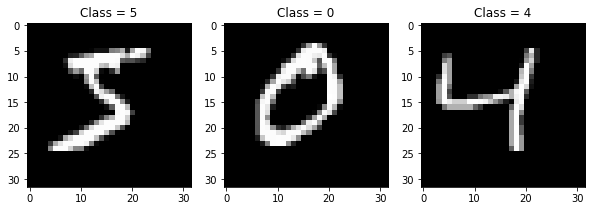

In [5]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train1[i][...,0], cmap='gray')
    plt.title('Class = {}'.format(y_train[i]))

In [6]:
zero_layer = Input(shape=(32, 32, 1))
first_layer = layers.Conv2D(filters=8, kernel_size=(3, 3), activation=None, padding='same')(zero_layer)
second_layer = layers.Conv2D(filters=16, kernel_size=(3, 3), activation=None, padding='same')(first_layer)
third_layer = layers.BatchNormalization()(second_layer)
fourth_layer = layers.Activation('relu')(third_layer)
fifth_layer = layers.MaxPool2D(strides=(2, 2))(fourth_layer)
sixth_layer = layers.Flatten()(fifth_layer)
seventh_layer = layers.Dense(100, activation = 'relu')(sixth_layer)
eighth_layer = layers.Dropout(0.25)(seventh_layer)
final_layer =  layers.Dense(10, activation='sigmoid')(eighth_layer)

In [7]:
model = Model(zero_layer, final_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0     

In [9]:
model.compile(loss=losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

In [10]:
history = model.fit(x_train1, y_train1, epochs=20, batch_size=32, 
                    validation_data=(x_test1, y_test1), shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.6147 - accuracy: 0.8095 - val_loss: 0.1201 - val_accuracy: 0.9663
Epoch 2/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1464 - accuracy: 0.9561 - val_loss: 0.0770 - val_accuracy: 0.9766
Epoch 3/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0951 - accuracy: 0.9719 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 4/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0.0497 - val_accuracy: 0.9827
Epoch 5/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0544 - accuracy: 0.9830 - val_loss: 0.0459 - val_accuracy: 0.9845
Epoch 6/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0410 - val_accuracy: 0.9862
Epoch 7/20
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 0.0422 -

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

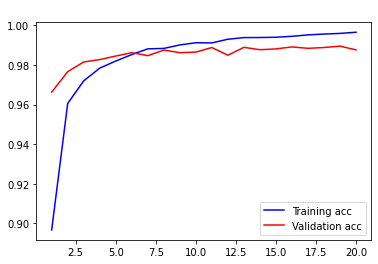

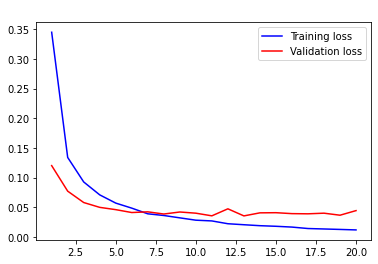

In [12]:
plt.plot(epochs, acc, 'b', color='blue', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='red', label='Validation acc')
plt.title('Training and validation accuracy', color='w')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')
plt.title('Training and validation loss', color='w')
plt.legend()

plt.show()